<a href="https://colab.research.google.com/github/ShaikArshidBanu/Deep-Learning-Algorithms-for-Surface-Defect-Detection/blob/main/Deep_Learning_Algorithms_for_Surface_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Developing Deep Learning Algorithms for Surface-Defect-Detection**

Implementation and Performance Analysis of Deep Learning Algorithms for Surface-Defect-Detection

**Step 1:Importing Neccessary libraries and data**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.layers import*
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

**Step 2:Loading the Data from the Dataset**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_data='/content/drive/MyDrive/NEU Metal Surface Defects Data/train'
testing_data='/content/drive/MyDrive/NEU Metal Surface Defects Data/test'
valid_data='/content/drive/MyDrive/NEU Metal Surface Defects Data/valid'

**Step 3:Preprocessing of data**

In [ ]:
train_datagenerated=ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagenerated.flow_from_directory(
        training_data,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        valid_data,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


**Step 4:Creating Models**

**Method-1: Sequential model**

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(2,2),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax'),
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

**Method-2: Functional model**

In [ ]:
input_shape = (200, 200, 3)
num_classes = 6
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_2= Model(inputs=inputs, outputs=outputs)
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0     

**Step 5:Compiling and Training the model**

**Method-1:Compiling and Training Sequential Model**

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #Compile the model
history=model.fit(train_generator,batch_size=32,epochs=15,validation_data=validation_generator,verbose=1,shuffle=True) #train the model

Epoch 1/15
166/166 [==============================] - 517s 3s/step - loss: 1.7615 - accuracy: 0.2464 - val_loss: 1.8938 - val_accuracy: 0.1667
Epoch 2/15
166/166 [==============================] - 158s 950ms/step - loss: 1.3598 - accuracy: 0.4644 - val_loss: 0.9348 - val_accuracy: 0.4583
Epoch 3/15
166/166 [==============================] - 155s 931ms/step - loss: 1.0355 - accuracy: 0.6522 - val_loss: 0.3948 - val_accuracy: 0.8750
Epoch 4/15
166/166 [==============================] - 167s 1s/step - loss: 0.8466 - accuracy: 0.7083 - val_loss: 0.3544 - val_accuracy: 0.9306
Epoch 5/15
166/166 [==============================] - 161s 970ms/step - loss: 0.6275 - accuracy: 0.7947 - val_loss: 0.3865 - val_accuracy: 0.8889
Epoch 6/15
166/166 [==============================] - 164s 986ms/step - loss: 0.5805 - accuracy: 0.8237 - val_loss: 0.1494 - val_accuracy: 0.9722
Epoch 7/15
166/166 [==============================] - 161s 973ms/step - loss: 0.5206 - accuracy: 0.8394 - val_loss: 0.1960 - val_a

 **Method-2:Compiling and Training Functional Model**

In [ ]:
# Compile the model
model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history2=model_2.fit(train_generator,batch_size=32,epochs=15,validation_data=validation_generator,verbose=1,shuffle=True) #train the model

Epoch 1/15
166/166 [==============================] - 107s 642ms/step - loss: 0.8619 - accuracy: 0.8104 - val_loss: 0.2214 - val_accuracy: 0.9444
Epoch 2/15
166/166 [==============================] - 108s 648ms/step - loss: 0.5034 - accuracy: 0.8315 - val_loss: 0.1347 - val_accuracy: 0.9722
Epoch 3/15
166/166 [==============================] - 102s 617ms/step - loss: 0.5084 - accuracy: 0.8466 - val_loss: 0.1417 - val_accuracy: 0.9722
Epoch 4/15
166/166 [==============================] - 100s 600ms/step - loss: 0.5020 - accuracy: 0.8557 - val_loss: 0.3605 - val_accuracy: 0.8889
Epoch 5/15
166/166 [==============================] - 100s 605ms/step - loss: 0.4432 - accuracy: 0.8762 - val_loss: 0.1073 - val_accuracy: 0.9583
Epoch 6/15
166/166 [==============================] - 100s 602ms/step - loss: 0.4019 - accuracy: 0.8810 - val_loss: 0.0951 - val_accuracy: 0.9861
Epoch 7/15
166/166 [==============================] - 100s 601ms/step - loss: 0.3989 - accuracy: 0.8883 - val_loss: 0.0681 -

**Plot of Model Accuracy and Model loss of Sequential Model**

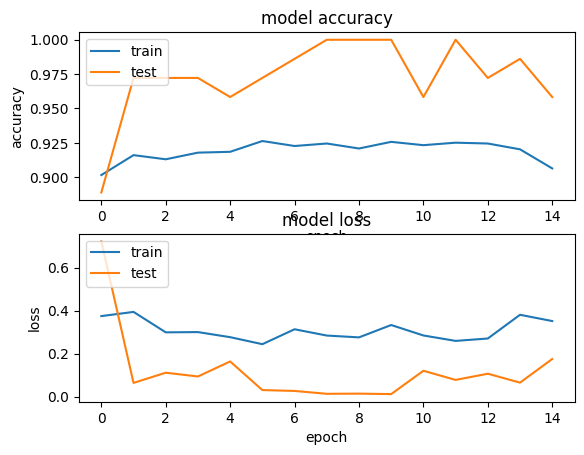

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)

#plot of model accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

#plot of model loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

**Plot of Model Accuracy and Model loss of Sequential Model**

NameError: ignored

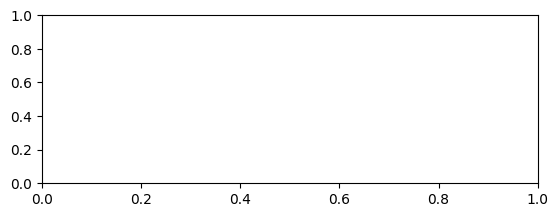

In [ ]:
import matplotlib.pyplot as plt
plt.figure(2)

#plot of model accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

#plot of model loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

**Step 6:Coversion of image files into array**

In [ ]:
from sklearn.datasets import load_files
import numpy as np

test_dir = testing_data

#function to load the dataset
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

x_test, y_test,target_labels = load_dataset(test_dir)

In [ ]:
no_of_classes=len(np.unique(y_test))
no_of_classes

6

In [ ]:
from keras.utils import np_utils
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

#function for converting image into array
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


**Visualization of Test Prediction of Sequential model**

3/3 [==============================] - 1s 315ms/step


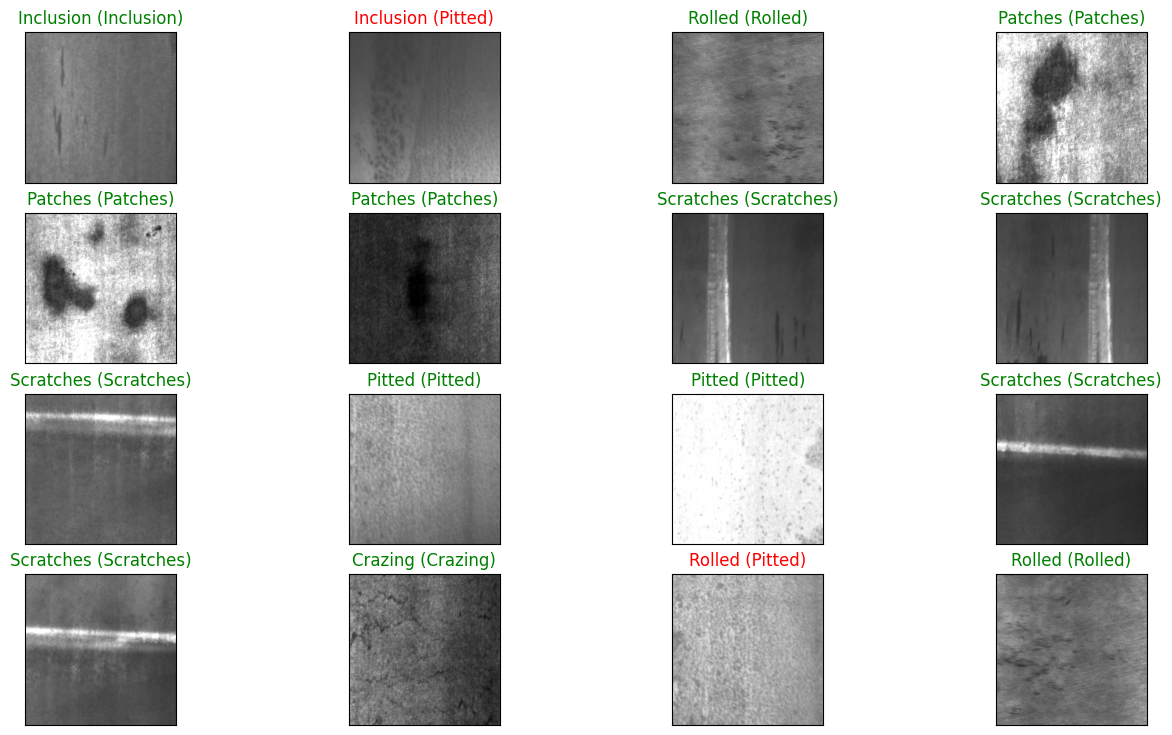

In [ ]:
x_test=x_test.astype('float32')/255
y_pred = model.predict(x_test)

# plot of a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

**Visualization of Test Prediction of Functional model**

3/3 [==============================] - 1s 229ms/step


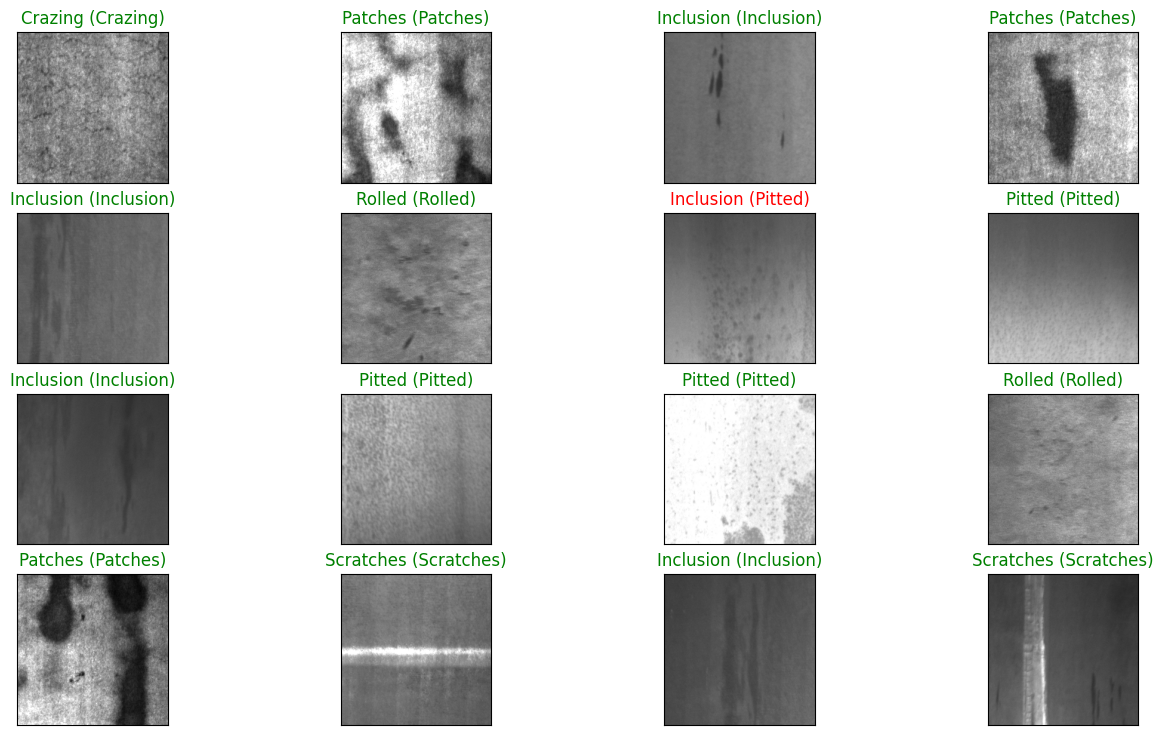

In [ ]:
x_test=x_test.astype('float32')/255
y_pred2 = model_2.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred2[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
y_pred= model.predict(x_test)
print(y_pred)

3/3 [==============================] - 1s 318ms/step
[[3.91725649e-07 1.24893780e-15 9.99999583e-01 5.51603374e-10
  9.14878958e-13 2.30932407e-09]
 [5.22750088e-06 9.83482501e-13 9.99994218e-01 2.81229973e-07
  1.29937369e-12 2.75684499e-07]
 [1.71609383e-04 6.95772702e-03 1.25667691e-06 7.96872831e-04
  9.90930200e-01 1.14228157e-03]
 [3.82229871e-07 9.66471493e-01 4.94947230e-08 1.04517378e-02
  2.27345299e-05 2.30538044e-02]
 [2.62975023e-04 2.71850147e-11 9.99731660e-01 2.93580570e-06
  3.45920431e-10 2.36465098e-06]
 [9.34651951e-07 9.78818207e-06 1.63678349e-10 1.25086126e-06
  9.99985993e-01 2.03282434e-06]
 [9.99999940e-01 4.93399173e-17 5.51736101e-10 5.98805938e-09
  3.06400516e-10 1.02180939e-13]
 [2.03138174e-04 2.12057828e-04 1.59035764e-07 7.81219787e-05
  9.99411702e-01 9.46908112e-05]
 [1.75712742e-08 8.28572923e-18 9.99999940e-01 4.36773742e-11
  8.57605705e-17 6.26934005e-10]
 [6.16991180e-12 4.10372643e-08 2.43724260e-11 3.96111322e-09
  2.61118266e-10 9.99999940e-0

In [ ]:
y_pred2=model_2.predict(x_test)
print(y_pred2)

3/3 [==============================] - 1s 333ms/step
[[3.56203123e-10 9.11097437e-16 9.99999940e-01 6.75704714e-10
  5.67267414e-11 1.18141649e-10]
 [9.38424183e-09 8.71590550e-15 9.99999940e-01 1.24431789e-08
  3.93172495e-10 8.63927985e-10]
 [8.11797916e-04 1.22316834e-02 4.09802087e-05 2.84262691e-02
  9.55936730e-01 2.55247881e-03]
 [5.47799783e-12 9.77835298e-01 1.31307725e-13 4.26285202e-03
  9.70246788e-07 1.79008413e-02]
 [1.39870332e-04 3.10220227e-14 9.99858141e-01 1.80833968e-06
  2.53818541e-07 1.92459133e-08]
 [4.83767690e-05 3.86776373e-04 4.66338896e-08 1.30775952e-04
  9.99415755e-01 1.82503172e-05]
 [9.99639690e-01 1.73501987e-13 1.90883434e-10 3.64345360e-05
  3.23800166e-04 6.64559987e-12]
 [5.44246286e-04 8.65532551e-03 1.77858681e-07 1.66094466e-03
  9.29510355e-01 5.96290082e-02]
 [1.12682280e-07 1.21014042e-19 9.99999821e-01 6.09658990e-11
  5.33902755e-10 1.42090974e-11]
 [1.43418779e-08 1.39253261e-05 1.27888015e-07 4.85801081e-07
  1.20896914e-06 9.99984205e-0

**Step 7:(i) Performance evaluation of Sequential Model**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
y_pred = (y_pred > 0.5)
metrics=classification_report (y_test,y_pred)
print (metrics)
print("Confusion Matrix: ")
CM=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
print (CM)

Performance Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        12
           3       1.00      0.75      0.86        12
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        12

   micro avg       0.97      0.96      0.97        72
   macro avg       0.98      0.96      0.96        72
weighted avg       0.98      0.96      0.96        72
 samples avg       0.96      0.96      0.96        72

Confusion Matrix: 
[[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 1  2  0  9  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Step 7:(ii) Performance evaluation of Functional Model**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print('Performance Metrics: ')
y_pred2=(y_pred2>0.5)
metrics=classification_report(y_test,y_pred2)
print(metrics)
print('Confusion Matrix')
CM=confusion_matrix(y_test.argmax(axis=1),y_pred2.argmax(axis=1))
print(CM)

Performance Metrics: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.80      1.00      0.89        12
           2       1.00      0.83      0.91        12
           3       1.00      0.83      0.91        12
           4       1.00      1.00      1.00        12
           5       1.00      0.92      0.96        12

   micro avg       0.93      0.93      0.93        72
   macro avg       0.94      0.93      0.93        72
weighted avg       0.94      0.93      0.93        72
 samples avg       0.93      0.93      0.93        72

Confusion Matrix
[[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 2  0 10  0  0  0]
 [ 0  2  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  1  0  0  0 11]]
